# Predicting if a person is a nerd

### Write something about the data
Explain the mode of capture and possible values
data dictionary etc etc.

In [86]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # visualization tool
import os as os
from IPython.display import HTML, display

In [87]:
sns.set(style="darkgrid")
os.chdir('c:\\ml\\project')
data = pd.read_csv('data.csv', sep = '\t')
data.shape

(25226, 80)

*The data contains **25226** rows and **80** columns*

Given below are the sample records

In [88]:
data.head(5)

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,race_arab,race_asian,race_black,race_white,race_hispanic,race_nativeam,race_nativeau,race_other,nerdy,ASD
0,3,5,3,3,5,5,5,3,5,5,...,0,0,0,1,0,0,0,0,7,2
1,4,4,4,3,5,2,5,1,4,4,...,0,0,0,1,0,0,0,0,6,2
2,5,5,5,5,5,5,5,5,5,5,...,0,0,0,1,0,0,0,0,7,2
3,5,5,5,5,5,5,5,3,5,5,...,0,0,0,1,0,0,0,0,7,2
4,4,4,4,4,4,4,4,4,4,5,...,0,0,0,1,0,0,0,0,6,2


Out of 80 columns, 78 are numeric

In [89]:
len(data.dtypes[data.dtypes==np.int64]) + len(data.dtypes[data.dtypes==np.float64])


78

The non-numeric columns are given below.

In [90]:
data.dtypes[data.dtypes == object]

country    object
major      object
dtype: object

## Tyding up the data

### Checking for missing values

The below table display the columns which have missing values or NAs.

In [91]:
html = '<table><tr><th>Attribute</th><th>Count</th></tr>'
for d in data.columns:
    if(data[d].isnull().sum() > 0):
        html = html + '<tr><td>'
        html = html + (d)
        html = html + ('</td><td>')
        html = html + (str(data[d].isnull().sum()))
        html = html + ('</td></tr>')
html = html + ('</table>')
display(HTML(html))
del d
del html

Attribute,Count
country,3
major,10998


The total nnumber of rows in data set is **25226**, out of which for column **major** 10998 values are missing.

##Reason for dropping major field.

In [92]:
majors = data['major'].unique()
data.drop("major", axis=1, inplace=True)

After dropping the major column, replacing the country NA values with **NONE**, the country field is captured by the website which hosts the survey and NONE is a valid value

In [94]:
data = data.replace(np.nan, 'NONE', regex=True)

### Validating data

Below we display the levels for categorical fields

In [95]:
categories = data.columns[~data.columns.isin(['age','introelapse', 'testelapse', 'surveyelapse', 'screenh',
                                              'screenw', 'familysize', 'country'])]

for d in categories:
    print(d.ljust(14), ':', data[d].unique())
del d

Q1             : [3 4 5 1 2 0]
Q2             : [5 4 3 2 1 0]
Q3             : [3 4 5 2 1 0]
Q4             : [3 5 4 2 1 0]
Q5             : [5 4 2 1 3 0]
Q6             : [5 2 4 3 1 0]
Q7             : [5 4 3 0 1 2]
Q8             : [3 1 5 4 2 0]
Q9             : [5 4 3 2 1 0]
Q10            : [5 4 0 3 2 1]
Q11            : [4 1 5 3 2 0]
Q12            : [5 4 3 1 2 0]
Q13            : [5 4 3 1 2 0]
Q14            : [5 4 3 2 1 0]
Q15            : [3 1 4 5 2 0]
Q16            : [5 3 2 1 4 0]
Q17            : [4 3 5 2 1 0]
Q18            : [5 3 4 1 2 0]
Q19            : [5 1 3 4 2 0]
Q20            : [5 3 4 1 0 2]
Q21            : [5 3 4 2 1 0]
Q22            : [5 3 1 4 2 0]
Q23            : [5 4 3 1 2 0]
Q24            : [5 4 3 2 1 0]
Q25            : [5 4 3 2 1 0]
Q26            : [5 0 4 3 2 1]
TIPI1          : [1 5 7 2 3 4 6 0]
TIPI2          : [1 3 6 2 5 4 7 0]
TIPI3          : [7 5 3 4 2 6 1 0]
TIPI4          : [1 4 7 3 5 6 2 0]
TIPI5          : [6 5 7 3 2 4 0 1]
TIPI6          : [7

All the columns/attributes above have valid values.

Checking numeric columns *'age','introelapse', 'testelapse', 'surveyelapse', 'screenh', 'screenw' and 'familysize'*

In [96]:
categories = data.columns[data.columns.isin(['age','introelapse', 'testelapse', 'surveyelapse', 'screenh',
                                              'screenw', 'familysize'])]
for d in categories:
    print(d.ljust(14), ':', str(min(data[d])).rjust(2), max(data[d]))
del d

introelapse    :  0 1381016
testelapse     :  1 698533
surveyelapse   :  2 15166994
age            : 13 38822
screenw        :  0 3840
screenh        :  0 2561
familysize     :  0 39947739


**age** field has values greater than 122, the maximum recorded age for a person in modern era. __https://en.wikipedia.org/wiki/Maximum_life_span#In_humans__

Checking the count of records where age > 122.

In [97]:
(data['age'] > 122).sum()

10

Since there are only 10 records where age is not valid, removing the records where age > 122

In [163]:
data = data[data['age']<122]
data.shape

(25211, 79)

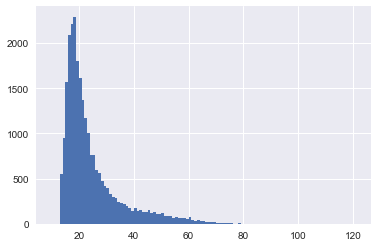

In [164]:
plt.hist(data['age'], bins=range(10, 122))
plt.show()

Family size field has a maximum value of 39947739, which seems to be incorrect. Checking the quantiles for the family size. 

In [110]:
data['familysize'].quantile([.01,.25,.5,.75,.99])

0.01    0.0
0.25    2.0
0.50    2.0
0.75    3.0
0.99    7.0
Name: familysize, dtype: float64

Although 99% of the values for family sizes are less than or equal to 7, removing rows greater where family size is greater than 25.

In [113]:
data = data.loc[data['familysize']<25]
data.shape

(25211, 79)

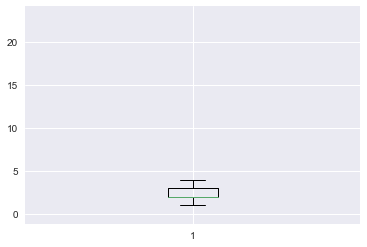

In [117]:
plt.boxplot(data['familysize'], showbox=True, autorange=True, showfliers=True)
plt.show()

In [150]:
data_temp = data.loc[data['screenw'] == 0]
len(data_temp['screenw'])

55

In [151]:
data_temp = data.loc[data['screenh'] == 0]
len(data_temp['screenh'])

55

for screen width and height there are certain records for which values are 0 which is not possible. Since these values are captured by automated scripts on the survey website, it can assumed the values were not captured for the records where it is 0.

Replacing the 0 values with median of these fields.

In [127]:
data['screenw'].quantile([.01,.25,.5,.75,.99])

0.01     320.0
0.25     375.0
0.50    1280.0
0.75    1440.0
0.99    2048.0
Name: screenw, dtype: float64

In [152]:
data['screenh'].quantile([.01,.25,.5,.75,.99])

0.01     412.0
0.25     667.0
0.50     768.0
0.75     900.0
0.99    1366.0
Name: screenh, dtype: float64

In [160]:
data['screenw'].replace(0,1280, inplace=True);
data['screenh'].replace(0,768, inplace=True);

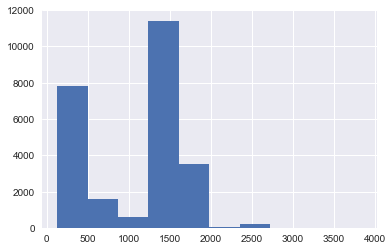

In [161]:
plt.hist(data['screenw'])
plt.show()

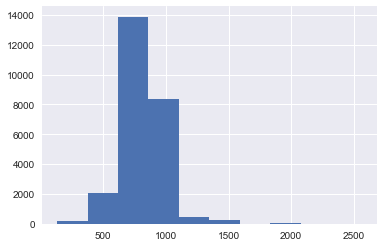

In [181]:
plt.hist(data['screenh'])
plt.show()

The fields **`introelapse`, `testelapse` `and` `surveyelapse`** capture the time spent by user on different screens, **`introduction/landing page`, `Research in Personality page` `and` `Demographic and survey questions`** respectively.

In [223]:
data['introelapse'].quantile([.01,.25,.5,.75,.90])

0.01      1.0
0.25      4.0
0.50     10.0
0.75     38.0
0.90    411.0
Name: introelapse, dtype: float64

In [220]:
data_temp = data.loc[data['introelapse'] > 3000]
len(data_temp['introelapse'])

464

There are values in for `introelapse` which are greater than .95 percentile value 1035.
The time on the computer screens are captured in milliseconds we suspect that the values for which it greater than .95 pecentile have been noted as milliseconds rather than seconds.

Assigning the value of 

In [ ]:
data.loc[data['introelapse'] > 1990, 'First Season']

In [208]:
data['testelapse'].quantile([.01,.25,.5,.75,.99])

0.01      48.0
0.25      82.0
0.50     105.0
0.75     140.0
0.99    1145.7
Name: testelapse, dtype: float64

In [217]:
data_temp = data.loc[data['testelapse'] > 3000]
len(data_temp['testelapse'])

array([  8542,  16568,   4665,  10723, 312045,  17802,  25822,   3216,
         3136,  68822,  39821,  19080,   3062,   9201,   3317,  92594,
        35322, 257638,  42166,  11164,   4562,  31721,  92462,   6920,
       698533,   5970,   3731,   3796,   5204,  17705,   3906,  37728,
         6030,  11205,   5147,  43242,  44251,   6978,   6921,  38552,
         3735, 679872,   8459,   6438,   5620,  78286,   3089,  12317,
        18955,  39055,  29708,   7407,   8608,   4297,   6461,  31213,
         6896,   6182, 285399, 474572,  61544, 434588,  10138,   6920,
         8304,   4759, 121771,   3481,   9086,   5466,   5587, 164867,
         3689, 374744,  10249,   3128, 407208,   5055, 127962,  21095,
         3030,  51753,  13470,  10870,   7432,  20566,  10167,   5376,
         7419, 240022,   7117,   9384,   6249,  69164,  71644,   6312,
         5600,   6048,   4396,  18127,   5066, 311476,   5229], dtype=int64)

In [210]:
data['surveyelapse'].quantile([.01,.25,.5,.75,.99])

0.01      72.0
0.25     126.0
0.50     164.0
0.75     216.0
0.99    1023.8
Name: surveyelapse, dtype: float64

In [213]:
data_temp = data.loc[data['surveyelapse'] > 1023.8]
len(data_temp['surveyelapse'])

253